In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from humps import decamelize

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Churn-Modelling-Dataset/master/Churn_Modelling.csv")

In [13]:
# I know snake_case is for python therefore I converted
cols = [decamelize(col) for col in df.columns]
df.columns = cols

In [38]:
category_columns = ['geography', 'gender', 'num_of_products'] # may use num_of_products as categorical

continuous_columns = ['credit_score', 'age', 'tenure', 'balance', 'has_cr_card', 'estimated_salary'] # is active member is big data leakage 


column_transformer = ct = ColumnTransformer(
    [("text_preprocess", OneHotEncoder(), category_columns),
     ("num_preprocess", MinMaxScaler(), continuous_columns)])


pipeline = Pipeline([("col_transformer", column_transformer), ("model", LogisticRegression())])


df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

p = pipeline.fit(df_train.drop('exited', axis=1), df_train['exited'])


In [39]:
x_pred = pipeline.predict(df_test.drop('exited', axis=1))

In [40]:
from sklearn.metrics import auc, roc_curve, classification_report

In [41]:
probs_pred = pipeline.predict_proba(df_test.drop('exited', axis=1))[:,0]

(array([  4.,   8.,  10.,   0.,   9.,  11.,   7.,   5.,   1.,   5.,   8.,
          4.,   1.,   9.,   4.,   3.,   5.,   4.,   9.,  14.,  13.,  10.,
         11.,   9.,  12.,  28.,  24.,  15.,  18.,  20.,  18.,  33.,  29.,
         35.,  28.,  40.,  47.,  70.,  50.,  82.,  70.,  86., 104., 109.,
        118., 111., 121., 178., 247., 143.]),
 array([0.00992486, 0.02949618, 0.0490675 , 0.06863882, 0.08821014,
        0.10778145, 0.12735277, 0.14692409, 0.16649541, 0.18606673,
        0.20563805, 0.22520937, 0.24478069, 0.26435201, 0.28392332,
        0.30349464, 0.32306596, 0.34263728, 0.3622086 , 0.38177992,
        0.40135124, 0.42092256, 0.44049387, 0.46006519, 0.47963651,
        0.49920783, 0.51877915, 0.53835047, 0.55792179, 0.57749311,
        0.59706443, 0.61663574, 0.63620706, 0.65577838, 0.6753497 ,
        0.69492102, 0.71449234, 0.73406366, 0.75363498, 0.77320629,
        0.79277761, 0.81234893, 0.83192025, 0.85149157, 0.87106289,
        0.89063421, 0.91020553, 0.92977685, 0.

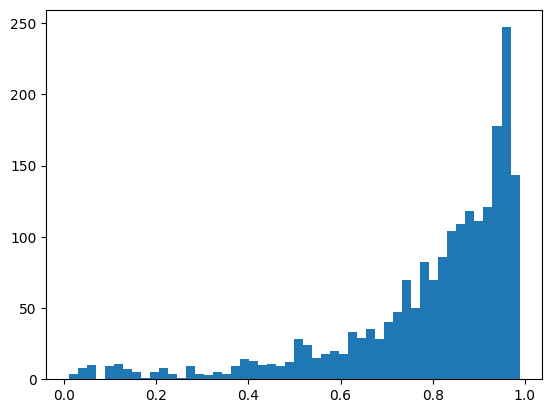

In [42]:
plt.hist(probs_pred, bins=50)

In [43]:
print(classification_report(df_test['exited'], x_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1607
           1       0.67      0.31      0.42       393

    accuracy                           0.83      2000
   macro avg       0.76      0.63      0.66      2000
weighted avg       0.82      0.83      0.81      2000

